# Taller 3 Análisis de Sentimientos en Reseñas de Películas (IMDB Movie Reviews Dataset)

## Grupo 6:

- Miguel Ángel Pablos  

- María Alejandra Olarte

- Carlos Mauricio Arteaga

In [ ]:
import pandas as pd

# 1. Comprension del negocio

In [ ]:
# Leer archivo csv
df = pd.read_csv('/content/IMDB Dataset.csv')
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# Configuración para mostrar todo el texto en las columnas
pd.set_option('display.max_colwidth', None)

In [ ]:
df['review'].sample(25)

,review
36914,"Sorry to repeat myself over and over, but here's another great Columbo episode. I guess that's why I'm such a fan - most episodes really are great! The best episodes always have a standout feature of some sort, and in this case the murderer and his accomplice are possibly the youngest ever Columbo villains.<br /><br />After watching a lot of episodes where Columbo and his adversary act like close friends, it's good to see an episode where tempers fray and bad feelings rise to the surface. It just gives an episode a bit more drama and bite. Columbo is rapidly onto the fact that the two students who claim to be helping him are not very secretly laughing at him and feeding him false clues. He happily plays along, deliberately turning up the bumbling in front of them to make them underestimate him! But of course he knows instantly when they are talking baloney.<br /><br />The murder itself is another complicated one, along the lines of The Bye Bye Sky High IQ episode, with a sophisticated chain reaction of events that manages to kill the intended target while providing the assassins with a seemingly watertight alibi. In the intervening years between 1978 and 1990, the technology has moved on from record players and firecrackers to remote control car locking systems and hidden cameras.<br /><br />Stephen Caffrey puts in a great performance as Justin Rowe, the obnoxious, spoilt student. Gary Hershberger is low-key but good as his ""yes-man"" friend Cooper Redman. And it's nice to see Robert Culp as Mr Rowe, Justin's dad.<br /><br />A very satisfying episode in all ways."
30195,"Watching QUINTET is not unlike watching a group of people playing a word game in Portuguese, or some other language you do not understand. You get the idea that they are playing a game, and if you watch closely enough, you may just begin to understand the rules. But, why bother, since it is clear you can't join in and you wouldn't want to if you had the chance.<br /><br />Director Robert Altman is not one to beg an audience to like his films, let alone understand them. Sometimes he lets you slip into the picture to be a part of the crowd, like in M*A*S*H, NASHVILLE and A WEDDING, films so full of hubbub and orchestrated chaos, one or two more bodies in the scene wouldn't make much of a difference. And other times, he seems to resent the fact that someone might even be watching his film; as in IMAGES or THREE WOMEN, where the stories are almost personal monologues made for an audience of one, Altman. With QUINTET, Altman seems to purposely dare anyone to become involved with the narrative. <br /><br />You can't depend on Altman to do the logical or the expected, which is sometimes the thing that makes his films so remarkably iconoclastic. But sometimes doing the unexpected isn't daring, just dumb. For instance, in QUINTET, we are introduced to a young woman who is apparently the last person on earth capable of getting pregnant, and she is, indeed, with child. This last ray of hope in a decaying society is almost immediately extinguished; Altman doesn't even wait until the end to play his last depressing card in this elaborate nihilistic and pessimistic tale. He lets us know how empty and meaningless life is right off the bat. Brave? Maybe. Stupid? Definitely. Devoid of a purpose, he tries to build a story on a rapidly melting iceberg, all the while reminding us how pointless the effort is. <br /><br />For the record, QUINTET, can at least claim to be prophetic. The story is centered on a treacherous game played by the various bored characters. It is a form of TAG (the assassination game): a handful of people target each other for elimination, each as a would-be assassin and each as a would-be victim. Two or more can form alliances to kill a third. As they die off, new targets are assigned. Whoever lives, wins. All of this happens at some exotic, inhospitable wasteland. It is, to a great extent, an extreme, sci-fi version of ""Survivor"" -- minus

# 2. Comprensión de los Datos

### Preprocesamiento (Limpieza del cuerpo del texto)

- Funcion de limpieza

In [ ]:
import pandas as pd
import re
import html

def clean_data_(df):
    """
    Función para limpiar una columna de texto en un DataFrame.
    Solicita al usuario el nombre de la columna a limpiar.

    Args:
    df (pd.DataFrame): DataFrame a limpiar.

    Returns:
    pd.DataFrame: DataFrame con la columna especificada limpiada.
    """
    print("Columnas disponibles en el DataFrame:")
    print(df.columns.tolist())

    # Solicitar el nombre de la columna a limpiar
    columna = input("Ingrese el nombre de la columna que desea limpiar: ").strip()
    if columna not in df.columns:
        raise ValueError(f"La columna '{columna}' no existe en el DataFrame.")

    # Asegurar que no hay valores NaN
    df[columna] = df[columna].fillna('')

    # Decodificar las entidades HTML
    df[columna] = df[columna].apply(html.unescape)

    # Eliminar etiquetas HTML como <br />, <p>, etc.
    df[columna] = df[columna].apply(lambda x: re.sub(r'<.*?>', '', x))

    # Convertir el texto a minúsculas
    df[columna] = df[columna].str.lower()

    # Reducir letras repetidas
    df[columna] = df[columna].apply(lambda x: re.sub(r'(.)\1{2,}', r'\1\1', x))

    # Eliminar palabras repetidas
    df[columna] = df[columna].apply(lambda x: re.sub(r'\b(\w+)( \1\b)+', r'\1', x))

    # Eliminar menciones
    df[columna] = df[columna].apply(lambda x: re.sub(r'@\w+', '', x))

    # Eliminar URLs
    df[columna] = df[columna].apply(lambda x: re.sub(r'http\S+|www\.\S+', '', x))

    # Eliminar puntuación
    df[columna] = df[columna].apply(lambda x: re.sub(r'[^\w\s]', '', x))

    # Eliminar números
    df[columna] = df[columna].apply(lambda x: re.sub(r'\d+', '', x))

    # Reemplazar caracteres no alfanuméricos con un espacio
    df[columna] = df[columna].apply(lambda x: re.sub(r'[^a-zA-Z0-9]', ' ', x))

    # Eliminar espacios en blanco adicionales
    df[columna] = df[columna].apply(lambda x: re.sub(r'\s+', ' ', x))

    # Retornar DataFrame limpio
    print(f"La columna '{columna}' ha sido limpiada.")
    return df


### Limpieza de texto con la funcion clean_data_

In [ ]:
clean_data_(df)

Columnas disponibles en el DataFrame:
['review', 'sentiment']
Ingrese el nombre de la columna que desea limpiar: review
La columna 'review' ha sido limpiada.


,review,sentiment
0,one of the other reviewers has mentioned that after watching just oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictures painted for mainstream audiences forget charm forget romanceoz doesnt mess around the first episode i ever saw struck me as so nasty it was surreal i couldnt say i was ready for it but as i watched more i developed a taste for oz and got accustomed to the high levels of graphic violence not just violence but injustice crooked guards wholl be sold out for a nickel inmates wholl kill on order and get away with it well mannered middle class inmates being turned into prison bitches due to their lack of street skills or prison experience watching oz you may become comfortable with what is uncomfortable viewingthats if you can get in touch with your darker side,positive
1,a wonderful little production the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great masters of comedy and his life the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwells murals decorating every surface are terribly well done,positive
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy the plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer while some may be disappointed when they realize this is not match point risk addiction i thought it was proof that woody allen is still fully in control of the style many of us have grown to lovethis was the most id laughed at one of woodys comedies in years dare i say a decade while ive never been impressed with scarlet johanson in this she managed to tone down her sexy image and jumped right into a average but spirited young womanthis may not be the crown jewel of his career but it was wittier than devil wears prada and more interesting than superman a great comedy to go see with friends,positive
3,basically theres a family where a little boy jake thinks theres a zombie in his closet his parents are fighting all the timethis movie is slower than a soap opera and suddenly jake decides to become rambo and kill the zombieok first of all when youre going to make a film you must decide if its a thriller or a drama as a drama the movie is watchable parents are divorcing arguing like in real life and then we have jake with his closet which totally ruins all the film i e

In [ ]:
pip install nltk

In [ ]:
'''
import os
import nltk

# Crear una carpeta personalizada para los datos
nltk_data_path = '/content/nltk_data'
os.makedirs(nltk_data_path, exist_ok=True)

# Especificar la ruta para NLTK
nltk.data.path.append(nltk_data_path)

# Descargar los datos en la carpeta personalizada
nltk.download('punkt', download_dir=nltk_data_path)
nltk.download('averaged_perceptron_tagger', download_dir=nltk_data_path)
'''

"\nimport os\nimport nltk\n\n# Crear una carpeta personalizada para los datos\nnltk_data_path = '/content/nltk_data'\nos.makedirs(nltk_data_path, exist_ok=True)\n\n# Especificar la ruta para NLTK\nnltk.data.path.append(nltk_data_path)\n\n# Descargar los datos en la carpeta personalizada\nnltk.download('punkt', download_dir=nltk_data_path)\nnltk.download('averaged_perceptron_tagger', download_dir=nltk_data_path)\n"

In [ ]:
import nltk
from nltk import pos_tag, word_tokenize
from collections import defaultdict

# Descargar datos necesarios para POS tagging
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [ ]:
# Dataframe con sentimientos positivos y negativos
df_pos = df[df['sentiment'] == 'positive']
df_neg = df[df['sentiment'] == 'negative']



In [ ]:
# Tokenizar y hacer POS tagging para sentimientos positivos y negativos
df_pos['review'] = df_pos['review'].apply(lambda x: pos_tag(word_tokenize(x)))
df_neg['review'] = df_neg['review'].apply(lambda x: pos_tag(word_tokenize(x)))

# Contar cuantas veces aparece cada POS tag
pos_counts_pos = defaultdict(int)
for row in df_pos['review']:
    for word, pos in row:
        pos_counts_pos[pos] += 1

pos_counts_neg = defaultdict(int)
for row in df_neg['review']:
    for word, pos in row:
        pos_counts_neg[pos] += 1

# Crear un DataFrame con los resultados
pos_df_pos = pd.DataFrame.from_dict(pos_counts_pos, orient='index', columns=['count'])
pos_df_neg = pd.DataFrame.from_dict(pos_counts_neg, orient='index', columns=['count'])

# Ordenar los resultados
pos_df_pos = pos_df_pos.sort_values('count', ascending=False)
pos_df_neg = pos_df_neg.sort_values('count', ascending=False)

# Mostrar los resultados
print("Sentimientos positivos:")
print(pos_df_pos)
print("\nSentimientos negativos:")
print(pos_df_neg)




<ipython-input-12-686735849a4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['review'] = df_pos['review'].apply(lambda x: pos_tag(word_tokenize(x)))
<ipython-input-12-686735849a4e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neg['review'] = df_neg['review'].apply(lambda x: pos_tag(word_tokenize(x)))


Sentimientos positivos:
        count
NN    1153406
IN     677003
DT     663902
JJ     558355
RB     349934
NNS    301172
VBZ    248751
CC     230857
PRP    214180
VB     199434
VBP    158083
VBD    153448
TO     130671
VBN    120038
VBG    116639
PRP$   108490
MD      52526
WP      36533
CD      36435
WDT     32887
WRB     32182
RP      26023
JJS     19813
JJR     17571
RBR     11453
EX      10876
PDT      7953
RBS      5813
FW       2559
WP$      1091
NNP      1010
UH        212
NNPS       70
''         13
POS        10
SYM         9
$           8
``          1

Sentimientos negativos:
        count
NN    1104210
DT     664462
IN     649370
JJ     529487
RB     369360
NNS    282138
VB     222793
VBZ    222773
PRP    211410
CC     209310
VBD    173766
VBP    164674
TO     136132
VBG    126107
VBN    121817
PRP$    90866
MD      57406
WRB     35595
WP      34584
CD      34254
WDT     31553
RP      29797
JJS     19945
JJR     18928
EX      13727
RBR     11446
PDT      8296
RBS      4413

In [ ]:
pos_df_neg

,count
NN,1104210
DT,664462
IN,649370
JJ,529487
RB,369360
NNS,282138
VB,222793
VBZ,222773
PRP,211410
CC,209310


- Sampleo para entender nueva composicion de los datos

In [ ]:
df['review'].sample(25)

,review
23754,first let me confess that i have not read this particular balzac novel so maybe i am directing my cavils unfairly at director and editor still my experience with balzac in other stories is that he writes as a realist not an obscurantist this is most certainly a film worth ones while but one is left sorely puzzled at the end was the colonel a fraud used by the lawyer for his own ends or for whose beyond himself or was the colonel not a fraud but used as aforesaid by the lawyer or did the lawyer truly try to serve the honest colonel the director andor the editor appear to me to have deliberately obscured these questions which doesnt seem like balzac the realist at the same time the film does an excellent job of delineating the characters if not their motives and the cast and production is superb that opening battlefield scene is bound to haunt ones dreams still one wonders at the all too common penchant among contemporary film makers to favor ambiguity above all else werent the problems and motives of all these characters complicated enough for yves angelo
1271,its this sort of movie that you try and imitate by attempting to realise something then flying through the air almost immediately id like to do that and i know you would toogreat stuff
12246,reese witherspoon plays dani a young country girl that falls madly in love with the new year old neighbor court played by jason london court tries his best to make dani realize that the difference in their ages would make a love relationship improbable soon the nubile charm of dani starts winning over courts will next enters the meeting of danis older sister played by emily warfield and the beginning of a short lived lovejealousy problemtess harper and sam waterston round out the cast this is a fresh free spirited but heartbreaking drama that touches down deep feel free to cry
37203,this movie was sweet the main character lady was sensitive to different men who wanted her she seemed not a character at all but a real person who had made some mistakes but was trying to set things right i liked the movie a lot even the older ladies who were lesbian didnt irritate me too much
8744,its a thoroughly successful example of a s biopic it has the stalwart and handsome young hero well not so young anymore on screen superb if unlikely direction by billy wilder a stirring fully orchestrated musical score of uplifting scales and when required heavenly strings by franz waxman strong supporting players a gripping story stunning photography by hitchcock favorite robert burks and a narrative about a singular historical eventthe film begins with jimmy stewart as charles lindbergh trying to get some sleep in a long island hotel before his epic solo flight across the atlantic from new york to paris and he cant sleepthe flight itself is filled with flashbacks to lindberghs personal history and the purchase and construction of his unique highwing monoplane the spirit of st louis st louis missouri is the home of the partnership that sponsored the flight even in money talked anyway the movie had to have multiple flashbacks and stewarts narration whats the alternative observing the unities thirtythree hours of watching jimmy stewart sitting silently at the controls of his noisy airplane while days and nights come and go i found the script and the direction impressive for their time unpleasant things are of course left out so as not to introduce more ambiguity than the contemporary audience might managemy bet is that the howling mob that surrounds lindbergh at le bourget ripped the airplane to pieces for souvenirs and of course nothing about the pilots relief tube though it would have added more opportunities for humor some of todays viewers will find some incidents corny if they think too much about them aloft stewart chats with a friendly hitchhiking fly that in its own quietly concerned way wakes him up by landing on his cheek at a critical moment later the st christophers medal that father hus

### Procesamiento de texto

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def stopwords_removal(corpus, language='english', exclude_wh_words=True):
    """
    Remueve las stopwords de un corpus de texto.
    """
    stop = set(stopwords.words(language))
    if exclude_wh_words:
        wh_words = ['who', 'what', 'when', 'why', 'how', 'which', 'where', 'whom']
        stop = stop - set(wh_words)  # Excluir palabras WH
    return [' '.join([word for word in text.split() if word not in stop]) for text in corpus]

def stem(corpus, stem_type=None, language='english'):
    """
    Aplica stemming a un corpus de texto.
    """
    if stem_type == 'snowball':
        stemmer = SnowballStemmer(language=language)
    else:
        stemmer = PorterStemmer()
    return [' '.join([stemmer.stem(word) for word in text.split()]) for text in corpus]

def lemmatize_column(corpus):
    """
    Aplica lematización a un corpus de texto.
    """
    lem = WordNetLemmatizer()
    return [' '.join([lem.lemmatize(word, pos='v') for word in text.split()]) for text in corpus]

def preprocess_dataframe(df, columna, stemming=True, stem_type=None, remove_stopwords=True, lemmatization=False):
    """
    Generaliza el preprocesamiento de texto para cualquier columna de un DataFrame.

    Args:
        df (pd.DataFrame): DataFrame que contiene la columna de texto.
        columna (str): Nombre de la columna de texto a procesar.
        stemming (bool): Aplicar o no stemming.
        stem_type (str): Tipo de stemmer ('snowball' o 'porter').
        remove_stopwords (bool): Remover o no stopwords.
        lemmatization (bool): Aplicar o no lematización.

    Returns:
        pd.DataFrame: DataFrame con la columna de texto procesada.
    """
    if columna not in df.columns:
        raise ValueError(f"La columna '{columna}' no existe en el DataFrame.")

    # Crear una copia para mantener el original
    df = df.copy()

    corpus = df[columna].fillna('').tolist()  # Asegurar que no hay NaN y convertir a lista

    # Remover stopwords
    if remove_stopwords:
        print("Eliminando stopwords...")
        corpus = stopwords_removal(corpus)

    # Aplicar stemming
    if stemming:
        print("Aplicando stemming...")
        corpus = stem(corpus, stem_type)

    # Aplicar lematización
    if lemmatization:
        print("Aplicando lematización...")
        corpus = lemmatize_column(corpus)

    # Asignar el corpus procesado de vuelta al DataFrame
    df[columna] = corpus
    print(f"Preprocesamiento completado para la columna '{columna}'.")
    return df

# Ejemplo de uso
# df_cleaned = preprocess_dataframe(
#     df,
#     columna='Text',
#     stemming=True,
#     stem_type='snowball',
#     remove_stopwords=True,
#     lemmatization=False
# )
# df_cleaned.head()

In [ ]:
# Aplicar preprocesamiento
df_cleaned = preprocess_dataframe(
    df,
    columna='review', #Columna a la que vamos a aplicar el preprocesamiento
    stemming=False,
    stem_type='snowball',
    remove_stopwords=True,
    lemmatization=True
)

df_cleaned.head()

Eliminando stopwords...
Aplicando lematización...
Preprocesamiento completado para la columna 'review'.


,review,sentiment
0,one reviewers mention watch oz episode youll hook right exactly what happen methe first thing strike oz brutality unflinching scenes violence which set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordit call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison where cells glass front face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffle death star dodgy dealings shady agreements never far awayi would say main appeal show due fact go where show wouldnt dare forget pretty picture paint mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw strike nasty surreal couldnt say ready watch develop taste oz get accustom high level graphic violence violence injustice crook guard wholl sell nickel inmates wholl kill order get away well mannered middle class inmates turn prison bitch due lack street skills prison experience watch oz may become comfortable what uncomfortable viewingthats get touch darker side,positive
1,wonderful little production film technique unassuming oldtimebbc fashion give comfort sometimes discomforting sense realism entire piece actors extremely well choose michael sheen get polari voice pat truly see seamless edit guide reference williams diary entries well worth watch terrificly write perform piece masterful production one great master comedy life realism really come home little things fantasy guard which rather use traditional dream techniques remain solid disappear play knowledge sense particularly scenes concern orton halliwell set particularly flat halliwells murals decorate every surface terribly well do,positive
2,think wonderful way spend time hot summer weekend sit air condition theater watch lighthearted comedy plot simplistic dialogue witty character likable even well bread suspect serial killer may disappoint when realize match point risk addiction think proof woody allen still fully control style many us grow lovethis id laugh one woodys comedies years dare say decade ive never impress scarlet johanson manage tone sexy image jump right average spirit young womanthis may crown jewel career wittier devil wear prada interest superman great comedy go see friends,positive
3,basically theres family where little boy jake think theres zombie closet parent fight timethis movie slower soap opera suddenly jake decide become rambo kill zombieok first when youre go make film must decide thriller drama drama movie watchable parent divorce argue like real life jake closet which totally ruin film expect see boogeyman similar movie instead watch drama meaningless thriller spot well play parent descent dialogs shots jake ignore,negative
4,petter matteis love time money visually stun film watch mr mattei offer us vivid portrait human relations movie seem tell us what money power success people different situations encounter variation arthur schnitzlers play theme director transfer action present time new york where different character meet connect one connect one way another next person one seem know previous point contact stylishly film sophisticate luxurious look take see how people live world live habitatthe thing one get souls picture different stag loneliness one inhabit big city exactly best place which human relations find sincere fulfillment one discern case people encounterthe act good mr matteis direction steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talented cast make character come alivewe wish mr mattei good luck await anxiously next work,positive


In [ ]:
df_cleaned['review'].head()

,review
0,one reviewers mention watch oz episode youll hook right exactly what happen methe first thing strike oz brutality unflinching scenes violence which set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordit call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison where cells glass front face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffle death star dodgy dealings shady agreements never far awayi would say main appeal show due fact go where show wouldnt dare forget pretty picture paint mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw strike nasty surreal couldnt say ready watch develop taste oz get accustom high level graphic violence violence injustice crook guard wholl sell nickel inmates wholl kill order get away well mannered middle class inmates turn prison bitch due lack street skills prison experience watch oz may become comfortable what uncomfortable viewingthats get touch darker side
1,wonderful little production film technique unassuming oldtimebbc fashion give comfort sometimes discomforting sense realism entire piece actors extremely well choose michael sheen get polari voice pat truly see seamless edit guide reference williams diary entries well worth watch terrificly write perform piece masterful production one great master comedy life realism really come home little things fantasy guard which rather use traditional dream techniques remain solid disappear play knowledge sense particularly scenes concern orton halliwell set particularly flat halliwells murals decorate every surface terribly well do
2,think wonderful way spend time hot summer weekend sit air condition theater watch lighthearted comedy plot simplistic dialogue witty character likable even well bread suspect serial killer may disappoint when realize match point risk addiction think proof woody allen still fully control style many us grow lovethis id laugh one woodys comedies years dare say decade ive never impress scarlet johanson manage tone sexy image jump right average spirit young womanthis may crown jewel career wittier devil wear prada interest superman great comedy go see friends
3,basically theres family where little boy jake think theres zombie closet parent fight timethis movie slower soap opera suddenly jake decide become rambo kill zombieok first when youre go make film must decide thriller drama drama movie watchable parent divorce argue like real life jake closet which totally ruin film expect see boogeyman similar movie instead watch drama meaningless thriller spot well play parent descent dialogs shots jake ignore
4,petter matteis love time money visually stun film watch mr mattei offer us vivid portrait human relations movie seem tell us what money power success people different situations encounter variation arthur schnitzlers play theme director transfer action present time new york where different character meet connect one connect one way another next person one seem know previous point contact stylishly film sophisticate luxurious look take see how people live world live habitatthe thing one get souls picture different stag loneliness one inhabit big city exactly best place which human relations find sincere fulfillment one discern case people encounterthe act good mr matteis direction steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talented cast make character come alivewe wish mr mattei good luck await anxiously next work


In [ ]:
# binarizar la columna sentiment para poder trabajar con ella
df_cleaned['sentiment'] = df_cleaned['sentiment'].map({'positive': 1, 'negative': 0})

df_cleaned.head()

,review,sentiment
0,one reviewers mention watch oz episode youll hook right exactly what happen methe first thing strike oz brutality unflinching scenes violence which set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordit call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison where cells glass front face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffle death star dodgy dealings shady agreements never far awayi would say main appeal show due fact go where show wouldnt dare forget pretty picture paint mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw strike nasty surreal couldnt say ready watch develop taste oz get accustom high level graphic violence violence injustice crook guard wholl sell nickel inmates wholl kill order get away well mannered middle class inmates turn prison bitch due lack street skills prison experience watch oz may become comfortable what uncomfortable viewingthats get touch darker side,1
1,wonderful little production film technique unassuming oldtimebbc fashion give comfort sometimes discomforting sense realism entire piece actors extremely well choose michael sheen get polari voice pat truly see seamless edit guide reference williams diary entries well worth watch terrificly write perform piece masterful production one great master comedy life realism really come home little things fantasy guard which rather use traditional dream techniques remain solid disappear play knowledge sense particularly scenes concern orton halliwell set particularly flat halliwells murals decorate every surface terribly well do,1
2,think wonderful way spend time hot summer weekend sit air condition theater watch lighthearted comedy plot simplistic dialogue witty character likable even well bread suspect serial killer may disappoint when realize match point risk addiction think proof woody allen still fully control style many us grow lovethis id laugh one woodys comedies years dare say decade ive never impress scarlet johanson manage tone sexy image jump right average spirit young womanthis may crown jewel career wittier devil wear prada interest superman great comedy go see friends,1
3,basically theres family where little boy jake think theres zombie closet parent fight timethis movie slower soap opera suddenly jake decide become rambo kill zombieok first when youre go make film must decide thriller drama drama movie watchable parent divorce argue like real life jake closet which totally ruin film expect see boogeyman similar movie instead watch drama meaningless thriller spot well play parent descent dialogs shots jake ignore,0
4,petter matteis love time money visually stun film watch mr mattei offer us vivid portrait human relations movie seem tell us what money power success people different situations encounter variation arthur schnitzlers play theme director transfer action present time new york where different character meet connect one connect one way another next person one seem know previous point contact stylishly film sophisticate luxurious look take see how people live world live habitatthe thing one get souls picture different stag loneliness one inhabit big city exactly best place which human relations find sincere fulfillment one discern case people encounterthe act good mr matteis direction steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talented cast make character come alivewe wish mr mattei good luck await anxiously next work,1


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


## Balance de clases

In [ ]:
# verificar el balance de clases
df_cleaned['sentiment'].value_counts(normalize=True)

,proportion
sentiment,
1,0.5
0,0.5


- El dataset esta completamente balanceado y hay la misma cantidad de reseñas negativas 0 y positivas 1

### Dividir el dataset en las dos categorias para analizar reseñas positivas y negativas.

In [ ]:
# Separar el dataset entre sentimientos positivos y negativos para hacer analisis de palabras
df_positive = df_cleaned[df_cleaned['sentiment'] == 1]
df_negative = df_cleaned[df_cleaned['sentiment'] == 0]

print(df_positive.head())
print(df_negative.head())


# Palabras mas comunes por categoria

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
# Definir una funcion para contar las palabras en un DataFrame.

def count_words(text, top_n=20):
    #Obtener las palabras mas frecuentes en el texto
    all_words = ' '.join(text).split()
    word_count = Counter(all_words)
    return word_count.most_common(top_n)

In [ ]:
# Obtener las palabras más comunes para positivas y negativas

top_positive_words = count_words(df_positive['review'], top_n=50)
top_negative_words = count_words(df_negative['review'], top_n=50)

print(top_positive_words)
print(top_negative_words)

[('film', 49020), ('movie', 36041), ('one', 25735), ('who', 21502), ('see', 21316), ('make', 20169), ('like', 19440), ('get', 15937), ('time', 15443), ('good', 14350), ('when', 14213), ('what', 14125), ('character', 13629), ('great', 12638), ('watch', 12494), ('story', 12381), ('go', 12292), ('show', 11910), ('which', 11846), ('love', 11490), ('think', 11457), ('well', 11310), ('really', 10638), ('also', 10553), ('would', 10366), ('play', 9760), ('even', 9621), ('know', 9196), ('much', 8980), ('first', 8864), ('take', 8854), ('end', 8718), ('people', 8641), ('find', 8592), ('give', 8542), ('say', 8472), ('best', 8315), ('come', 8268), ('how', 8178), ('look', 7891), ('way', 7554), ('many', 7475), ('life', 7377), ('work', 7253), ('movies', 7090), ('two', 6879), ('dont', 6598), ('act', 6588), ('little', 6397), ('man', 6337)]
[('movie', 47534), ('film', 43097), ('one', 24646), ('make', 23776), ('like', 23493), ('see', 19360), ('get', 19227), ('who', 18616), ('what', 15313), ('even', 15083)

In [ ]:
print("Top Positive Words:")
for word, count in top_positive_words:
    print(f"{word}: {count}")

print("\nTop Negative Words:")
for word, count in top_negative_words:
    print(f"{word}: {count}")

Top Positive Words:
film: 49020
movie: 36041
one: 25735
who: 21502
see: 21316
make: 20169
like: 19440
get: 15937
time: 15443
good: 14350
when: 14213
what: 14125
character: 13629
great: 12638
watch: 12494
story: 12381
go: 12292
show: 11910
which: 11846
love: 11490
think: 11457
well: 11310
really: 10638
also: 10553
would: 10366
play: 9760
even: 9621
know: 9196
much: 8980
first: 8864
take: 8854
end: 8718
people: 8641
find: 8592
give: 8542
say: 8472
best: 8315
come: 8268
how: 8178
look: 7891
way: 7554
many: 7475
life: 7377
work: 7253
movies: 7090
two: 6879
dont: 6598
act: 6588
little: 6397
man: 6337

Top Negative Words:
movie: 47534
film: 43097
one: 24646
make: 23776
like: 23493
see: 19360
get: 19227
who: 18616
what: 15313
even: 15083
watch: 14577
go: 14502
time: 14350
good: 14151
bad: 14036
character: 13943
would: 13632
when: 13184
think: 12501
really: 12103
look: 11318
which: 11138
say: 10534
act: 10128
dont: 10037
much: 9863
story: 9681
show: 9479
know: 9458
people: 9352
end: 9230
how: 

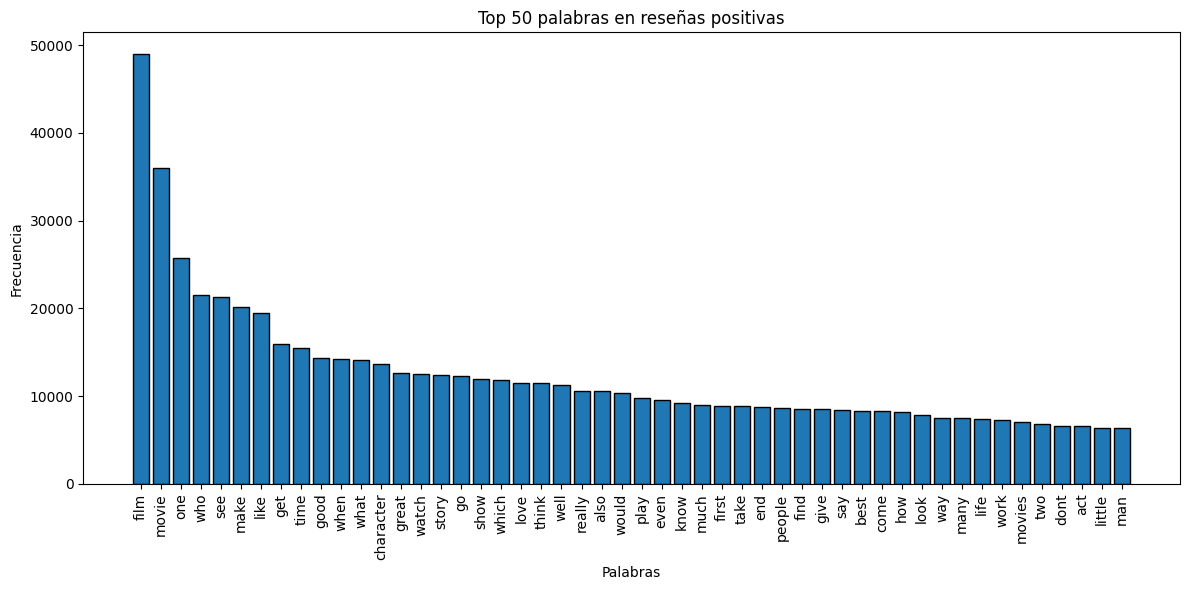

In [ ]:
# Ajustar el ancho de las barras y agregar separación
plt.figure(figsize=(12, 6))
bar_width = 0.8
plt.bar(
    [word for word, count in top_positive_words],
    [count for word, count in top_positive_words],
    width=bar_width,
    edgecolor='black'
)
plt.xticks(rotation=90)
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Top 50 palabras en reseñas positivas')
plt.tight_layout()
plt.show()

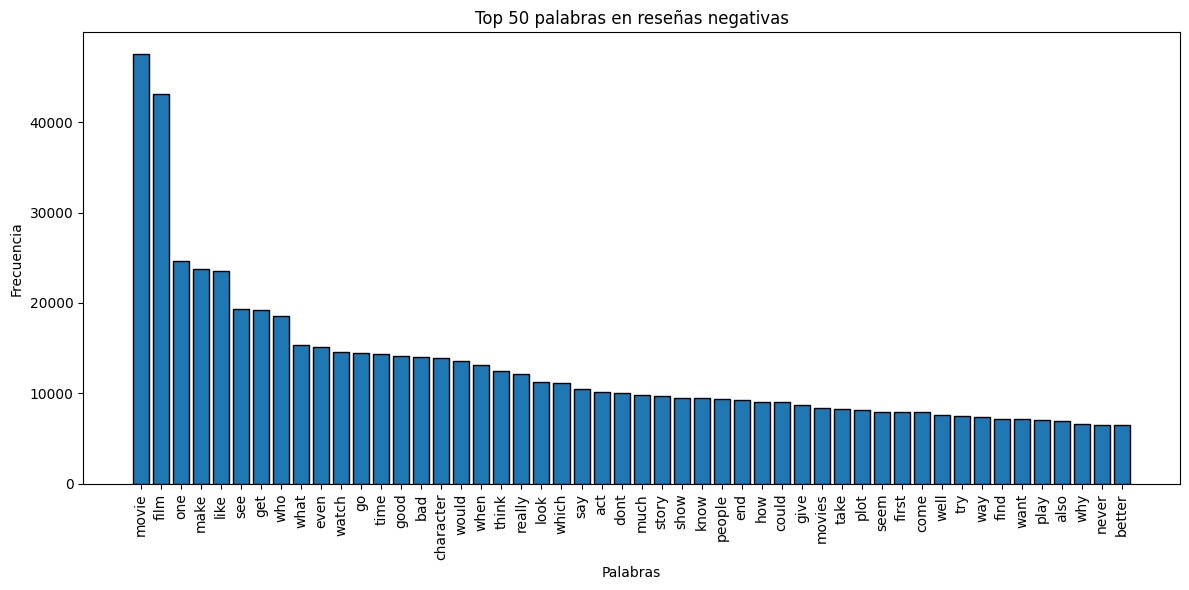

In [ ]:
# generar un gráfico de barras para las palabras más comunes en las reseñas negativas
plt.figure(figsize=(12, 6))
bar_width = 0.8
plt.bar(
    [word for word, count in top_negative_words],
    [count for word, count in top_negative_words],
    width=bar_width,
    edgecolor='black'
)
plt.xticks(rotation=90)
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Top 50 palabras en reseñas negativas')
plt.tight_layout()
plt.show()

### Analsis de frecuencia de palabras ----------

In [ ]:
# Analsis de longitud promedio de las reseñas
df_cleaned['review_length'] = df_cleaned['review'].apply(len)

# Calcular la longitud promedio de las reseñas positivas y negativas
positive_avg_length = df_cleaned[df_cleaned['sentiment'] == 1]['review_length'].mean()
negative_avg_length = df_cleaned[df_cleaned['sentiment'] == 0]['review_length'].mean()
positive_mode_length = df_cleaned[df_cleaned['sentiment'] == 1]['review_length'].mode()
negative_mode_length = df_cleaned[df_cleaned['sentiment'] == 0]['review_length'].mode()

print(f"Longitud promedio de reseñas positivas: {positive_avg_length:.2f}")
print(f"Longitud promedio de reseñas negativas: {negative_avg_length:.2f}")
print(f"Moda de la longitud de reseñas positivas: {positive_mode_length.values[0]}")
print(f"Moda de la longitud de reseñas negativas: {negative_mode_length.values[0]}")

Longitud promedio de reseñas positivas: 830.34
Longitud promedio de reseñas negativas: 798.54
Moda de la longitud de reseñas positivas: 444
Moda de la longitud de reseñas negativas: 405


- Las reseñas positivas tinden a tener una cantidad de caracteres mayor a las reseñas negativas.

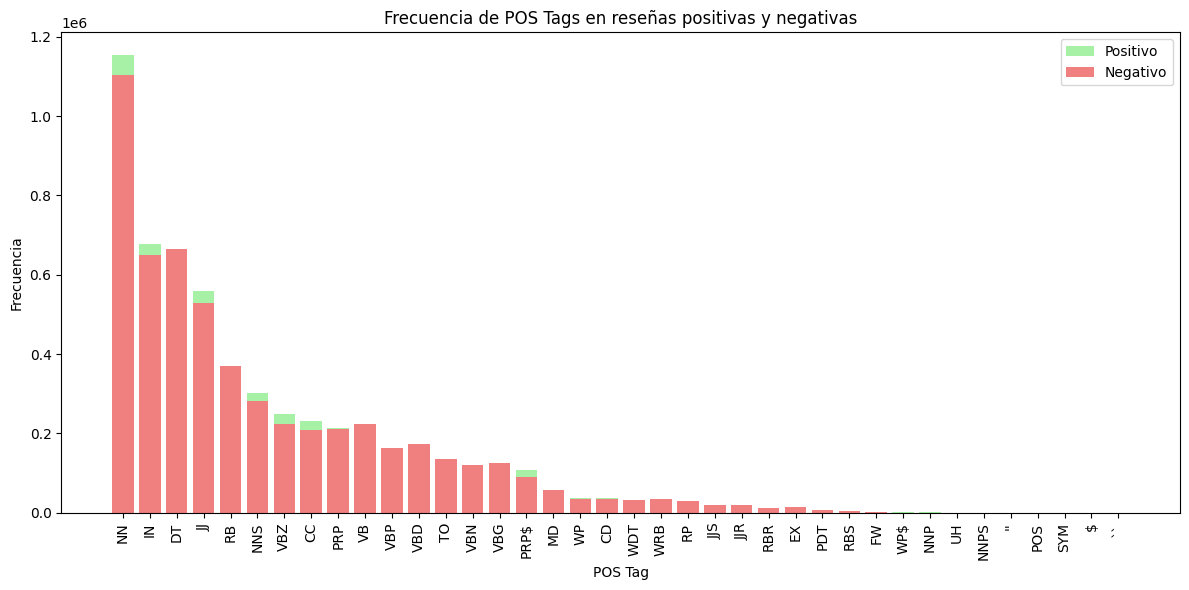

In [ ]:
# grafica de frecuencia del analisis pos tagging
plt.figure(figsize=(12, 6))
plt.bar(
    pos_df_pos.index,
    pos_df_pos['count'],
    color='lightgreen',
    alpha=0.8,
    label='Positivo'
)
plt.bar(
    pos_df_neg.index,
    pos_df_neg['count'],
    color='lightcoral',
    alpha=1,
    label='Negativo'
)
plt.xticks(rotation=90)
plt.xlabel('POS Tag')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de POS Tags en reseñas positivas y negativas')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objects as go

# Crear las barras para las reseñas positivas y negativas
fig = go.Figure()

# Barras para reseñas positivas
fig.add_trace(go.Bar(
    x=pos_df_pos.index,
    y=pos_df_pos['count'],
    name='Positivo',
    marker_color='lightgreen',
    opacity=0.8,  # Ajustar la transparencia para mejor visualización
    hovertemplate='POS Tag: %{x}<br>Frecuencia: %{y}<extra></extra>'
))

# Barras para reseñas negativas
fig.add_trace(go.Bar(
    x=pos_df_neg.index,
    y=pos_df_neg['count'],
    name='Negativo',
    marker_color='lightcoral',
    opacity=0.6,  # Ajustar la transparencia para diferenciar mejor las barras
    hovertemplate='POS Tag: %{x}<br>Frecuencia: %{y}<extra></extra>'
))

# Ajustes de diseño
fig.update_layout(
    barmode='overlay',  # Barras superpuestas
    xaxis_title='POS Tag',
    yaxis_title='Frecuencia',
    title='Frecuencia de POS Tags en reseñas positivas y negativas',
    xaxis_tickangle=90,  # Rotar etiquetas del eje X
    template='plotly_dark',  # Tema oscuro
    showlegend=True
)

# Mostrar la gráfica
fig.show()


### Preguntas clave:

- ¿Qué palabras son más frecuentes en las reseñas?
- ¿Hay patrones significativos en el uso de lenguaje?

## 3. Preparación de los Datos

### Nube de palabras

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

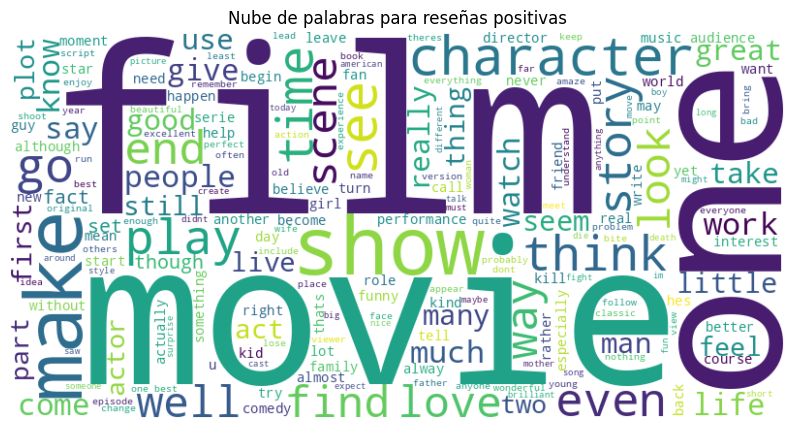

In [ ]:
# Nube de palabras para reseñas positivas
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(df_positive['review']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras para reseñas positivas')
plt.show()

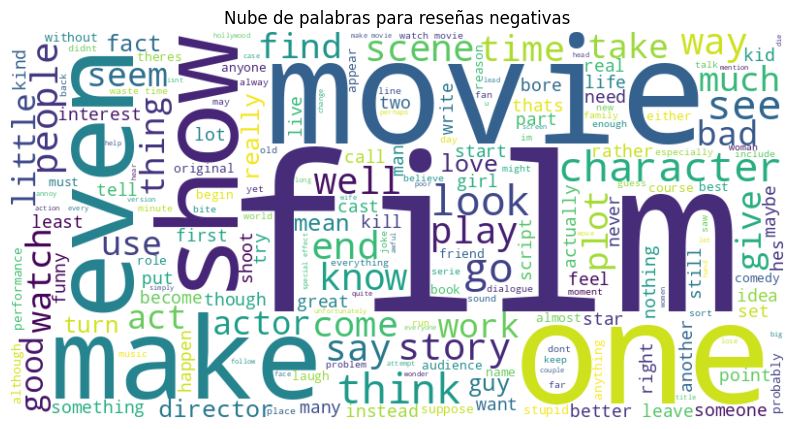

In [ ]:
# Nube de palabras para reseñas negativas
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(df_negative['review']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras para reseñas negativas')
plt.show()

In [ ]:
# Tokenizar df_positive['review'] y df_negative['review'] para contar bigramas y trigramas

from nltk import ngrams
from nltk.tokenize import word_tokenize

# Tokenizar reseñas positivas y negativas
df_positive['tokens'] = df_positive['review'].apply(lambda x: word_tokenize(x))
df_negative['tokens'] = df_negative['review'].apply(lambda x: word_tokenize(x))

# Contar bigramas, trigramas, cuatrigramas
df_positive['bigrams'] = df_positive['tokens'].apply(lambda x: list(ngrams(x, 2)))
df_positive['trigrams'] = df_positive['tokens'].apply(lambda x: list(ngrams(x, 3)))
df_positive['cuatrigrams'] = df_positive['tokens'].apply(lambda x: list(ngrams(x, 4)))
df_negative['bigrams'] = df_negative['tokens'].apply(lambda x: list(ngrams(x, 2)))
df_negative['trigrams'] = df_negative['tokens'].apply(lambda x: list(ngrams(x, 3)))
df_negative['cuatrigrams'] = df_negative['tokens'].apply(lambda x: list(ngrams(x, 4)))



<ipython-input-35-c3e155950948>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-35-c3e155950948>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-35-c3e155950948>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-35-c3e155

In [ ]:
df_positive.head(1)

,review,sentiment,tokens,bigrams,trigrams,cuatrigrams
0,one reviewers mention watch oz episode youll hook right exactly what happen methe first thing strike oz brutality unflinching scenes violence which set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordit call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison where cells glass front face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffle death star dodgy dealings shady agreements never far awayi would say main appeal show due fact go where show wouldnt dare forget pretty picture paint mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw strike nasty surreal couldnt say ready watch develop taste oz get accustom high level graphic violence violence injustice crook guard wholl sell nickel inmates wholl kill order get away well mannered middle class inmates turn prison bitch due lack street skills prison experience watch oz may become comfortable what uncomfortable viewingthats get touch darker side,1,"[one, reviewers, mention, watch, oz, episode, youll, hook, right, exactly, what, happen, methe, first, thing, strike, oz, brutality, unflinching, scenes, violence, which, set, right, word, go, trust, show, faint, hearted, timid, show, pull, punch, regard, drug, sex, violence, hardcore, classic, use, wordit, call, oz, nickname, give, oswald, maximum, security, state, penitentary, focus, mainly, emerald, city, experimental, section, prison, where, cells, glass, front, face, inwards, privacy, high, agenda, em, city, home, manyaryans, muslims, gangstas, latinos, christians, italians, irish, moreso, scuffle, death, star, dodgy, dealings, shady, agreements, never, far, awayi, would, say, main, appeal, show, due, fact, go, where, show, wouldnt, dare, ...]","[(one, reviewers), (reviewers, mention), (mention, watch), (watch, oz), (oz, episode), (episode, youll), (youll, hook), (hook, right), (right, exactly), (exactly, what), (what, happen), (happen, methe), (methe, first), (first, thing), (thing, strike), (strike, oz), (oz, brutality), (brutality, unflinching), (unflinching, scenes), (scenes, violence), (violence, which), (which, set), (set, right), (right, word), (word, go), (go, trust), (trust, show), (show, faint), (faint, hearted), (hearted, timid), (timid, show), (show, pull), (pull, punch), (punch, regard), (regard, drug), (drug, sex), (sex, violence), (violence, hardcore), (hardcore, classic), (classic, use), (use, wordit), (wordit, call), (call, oz), (oz, nickname), (nickname, give), (give, oswald), (oswald, maximum), (maximum, security), (security, state), (state, penitentary), (penitentary, focus), (focus, mainly), (mainly, emerald), (emerald, city), (city, experimental), (experimental, section), (section, prison), (prison, where), (where, cells), (cells, glass), (glass, front), (front, face), (face, inwards), (inwards, privacy), (privacy, high), (high, agenda), (agenda, em), (em, city), (city, home), (home, manyaryans), (manyaryans, muslims), (muslims, gangstas), (gangstas, latinos), (latinos, christians), (christians, italians), (italians, irish), (irish, moreso), (moreso, scuffle), (scuffle, death), (death, star), (star, dodgy), (dodgy, dealings), (dealings, shady), (shady, agreements), (agreements, never), (never, far), (far, awayi), (awayi, would), (would, say), (say, main), (main, appeal), (appeal, show), (show, due), (due, fact), (fact, go), (go, where), (where, show), (show, wouldnt), (wouldnt, dare), (dare, forget), ...]","[(one, reviewers, mention), (reviewers, mention, watch), (mention, watch, oz), (watch, oz, episode), (oz, episode, youll), (episode, youll, hook), (youll, hook, right), (hook, right, exactly), (right, exactly, what), (exactly, what, happen), (what, happen, methe), (happen, methe, first), (methe, first, thing), (first, thi

In [ ]:
from collections import Counter

# Contar los bigramas más comunes
def contar_bigramas(df, columna='bigrams', top_n=10):
    # Aplanar la lista de listas de bigramas
    bigramas = [bigram for row in df[columna] for bigram in row]
    # Usar Counter para contar las frecuencias
    contador_bigramas = Counter(bigramas)
    # Obtener los bigramas más comunes
    return contador_bigramas.most_common(top_n)

# Contar los trigramas más comunes
def contar_trigramas(df, columna='trigrams', top_n=10):
    # Aplanar la lista de listas de trigramas
    trigramas = [trigram for row in df[columna] for trigram in row]
    # Usar Counter para contar las frecuencias
    contador_trigramas = Counter(trigramas)
    # Obtener los trigramas más comunes
    return contador_trigramas.most_common(top_n)

# Contar los cuatrigramas más comunes
def contar_cuatrigramas(df, columna='cuatrigrams', top_n=10):
    # Aplanar la lista de listas de cuatrigramas
    cuatrigramas = [cuatrigram for row in df[columna] for cuatrigram in row]
    # Usar Counter para contar las frecuencias
    contador_cuatrigramas = Counter(cuatrigramas)
    # Obtener los cuatrigramas más comunes
    return contador_cuatrigramas.most_common(top_n)



In [ ]:
# Calcular bigramas más comunes para reseñas positivas
top_bigramas = contar_bigramas(df_positive, columna='bigrams', top_n=25)
print("Bigramas más comunes:")
for bigrama, frecuencia in top_bigramas:
    print(f"{bigrama}: {frecuencia}")

# Calcular trigramas más comunes para reseñas positivas
top_trigramas = contar_trigramas(df_positive, columna='trigrams', top_n=25)
print("\nTrigramas más comunes:")
for trigrama, frecuencia in top_trigramas:
    print(f"{trigrama}: {frecuencia}")

# Calcular cuatrigramas más comunes para reseñas positivas
top_cuatrigramas = contar_cuatrigramas(df_positive, columna='cuatrigrams', top_n=25)
print("\nCuatrigramas más comunes:")
for cuatrigrama, frecuencia in top_cuatrigramas:
    print(f"{cuatrigrama}: {frecuencia}")


Bigramas más comunes:
('one', 'best'): 1609
('see', 'movie'): 1219
('watch', 'movie'): 1144
('ive', 'see'): 1065
('ever', 'see'): 1028
('even', 'though'): 1017
('see', 'film'): 1013
('know', 'what'): 951
('can', 'not'): 943
('people', 'who'): 925
('look', 'like'): 919
('first', 'time'): 909
('make', 'film'): 879
('dont', 'know'): 862
('film', 'make'): 846
('main', 'character'): 821
('man', 'who'): 820
('highly', 'recommend'): 804
('new', 'york'): 802
('special', 'effect'): 786
('take', 'place'): 767
('what', 'happen'): 757
('watch', 'film'): 757
('make', 'movie'): 721
('years', 'ago'): 703

Trigramas más comunes:
('ive', 'ever', 'see'): 349
('new', 'york', 'city'): 180
('film', 'ive', 'see'): 159
('world', 'war', 'ii'): 153
('film', 'ever', 'make'): 150
('one', 'best', 'film'): 144
('one', 'best', 'movies'): 141
('when', 'first', 'saw'): 140
('dont', 'know', 'what'): 128
('base', 'true', 'story'): 122
('first', 'time', 'saw'): 115
('would', 'like', 'see'): 110
('dont', 'know', 'why'): 

In [ ]:
# Calcular bigramas más comunes para reseñas negativas
top_bigramas = contar_bigramas(df_negative, columna='bigrams', top_n=50)
print("Bigramas más comunes:")
for bigrama, frecuencia in top_bigramas:
    print(f"{bigrama}: {frecuencia}")

# Calcular trigramas más comunes para reseñas negativas
top_trigramas = contar_trigramas(df_negative, columna='trigrams', top_n=50)
print("\nTrigramas más comunes:")
for trigrama, frecuencia in top_trigramas:
    print(f"{trigrama}: {frecuencia}")

# Calcular cuatrigramas más comunes para reseñas negativas
top_cuatrigramas = contar_cuatrigramas(df_negative, columna='cuatrigrams', top_n=50)
print("\nCuatrigramas más comunes:")
for cuatrigrama, frecuencia in top_cuatrigramas:
    print(f"{cuatrigrama}: {frecuencia}")


Bigramas más comunes:
('look', 'like'): 2745
('ever', 'see'): 1762
('watch', 'movie'): 1625
('waste', 'time'): 1595
('special', 'effect'): 1413
('dont', 'know'): 1194
('make', 'movie'): 1161
('can', 'not'): 1150
('see', 'movie'): 1131
('people', 'who'): 1092
('ive', 'see'): 1091
('know', 'what'): 1061
('main', 'character'): 1057
('seem', 'like'): 998
('much', 'better'): 958
('one', 'worst'): 940
('movie', 'make'): 936
('make', 'sense'): 898
('want', 'see'): 890
('make', 'film'): 885
('low', 'budget'): 855
('even', 'though'): 852
('what', 'happen'): 851
('ive', 'ever'): 843
('bad', 'movie'): 820
('film', 'make'): 800
('watch', 'film'): 791
('horror', 'film'): 775
('im', 'sure'): 774
('bad', 'guy'): 746
('see', 'film'): 707
('worst', 'movie'): 707
('feel', 'like'): 687
('dont', 'think'): 680
('pretty', 'much'): 677
('really', 'bad'): 677
('movie', 'ever'): 667
('good', 'movie'): 655
('bad', 'act'): 645
('take', 'place'): 626
('worst', 'film'): 615
('horror', 'movie'): 611
('film', 'like'

## -- Hallazgos y concluciones?

### Analsis de palabras filtradas.

In [ ]:
# Etiquetas POS que deseas conservar
etiquetas_deseadas = {'NN', 'NNS', 'NNP', 'NNPS',  # Sustantivos (EJ: gato, perros)
                      'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ',  # Verbos (EJ: correr, corriendo)
                      'JJ', 'JJR', 'JJS',                       # Adjetivos (EJ: rápido)
                      #'RB', 'RBR', 'RBS', # Adverbios (EJ: rápidamente)
                      #'CD','FW' # Numeros y palabras extranjeras (EJ: 1, 2, 3)(EJ: bonjour)
                      }

def filtrar_por_pos(texto, etiquetas_deseadas):
    """
    Filtra las palabras de un texto según etiquetas POS deseadas.

    Args:
        texto (str): Texto original.
        etiquetas_deseadas (set): Conjunto de etiquetas POS que se desean conservar.

    Returns:
        str: Texto filtrado con solo las palabras de las etiquetas deseadas.
    """
    # Tokenizar el texto
    tokens = word_tokenize(texto)
    # Aplicar POS tagging
    pos_tags = pos_tag(tokens)
    # Filtrar palabras con las etiquetas deseadas
    palabras_filtradas = [word for word, pos in pos_tags if pos in etiquetas_deseadas]
    # Reconstruir el texto filtrado
    return ' '.join(palabras_filtradas)



In [ ]:
# Aplicar la función a la columna de texto del DataFrame
df_positive['filtered_text'] = df_positive['review'].apply(lambda x: filtrar_por_pos(x, etiquetas_deseadas))

# Ver los resultados
print(df_positive[['review', 'filtered_text']].head())

<ipython-input-41-1f2c669a25b9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_positive.head(1)

,review,sentiment,tokens,bigrams,trigrams,cuatrigrams,filtered_text
0,one reviewers mention watch oz episode youll hook right exactly what happen methe first thing strike oz brutality unflinching scenes violence which set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordit call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison where cells glass front face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffle death star dodgy dealings shady agreements never far awayi would say main appeal show due fact go where show wouldnt dare forget pretty picture paint mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw strike nasty surreal couldnt say ready watch develop taste oz get accustom high level graphic violence violence injustice crook guard wholl sell nickel inmates wholl kill order get away well mannered middle class inmates turn prison bitch due lack street skills prison experience watch oz may become comfortable what uncomfortable viewingthats get touch darker side,1,"[one, reviewers, mention, watch, oz, episode, youll, hook, right, exactly, what, happen, methe, first, thing, strike, oz, brutality, unflinching, scenes, violence, which, set, right, word, go, trust, show, faint, hearted, timid, show, pull, punch, regard, drug, sex, violence, hardcore, classic, use, wordit, call, oz, nickname, give, oswald, maximum, security, state, penitentary, focus, mainly, emerald, city, experimental, section, prison, where, cells, glass, front, face, inwards, privacy, high, agenda, em, city, home, manyaryans, muslims, gangstas, latinos, christians, italians, irish, moreso, scuffle, death, star, dodgy, dealings, shady, agreements, never, far, awayi, would, say, main, appeal, show, due, fact, go, where, show, wouldnt, dare, ...]","[(one, reviewers), (reviewers, mention), (mention, watch), (watch, oz), (oz, episode), (episode, youll), (youll, hook), (hook, right), (right, exactly), (exactly, what), (what, happen), (happen, methe), (methe, first), (first, thing), (thing, strike), (strike, oz), (oz, brutality), (brutality, unflinching), (unflinching, scenes), (scenes, violence), (violence, which), (which, set), (set, right), (right, word), (word, go), (go, trust), (trust, show), (show, faint), (faint, hearted), (hearted, timid), (timid, show), (show, pull), (pull, punch), (punch, regard), (regard, drug), (drug, sex), (sex, violence), (violence, hardcore), (hardcore, classic), (classic, use), (use, wordit), (wordit, call), (call, oz), (oz, nickname), (nickname, give), (give, oswald), (oswald, maximum), (maximum, security), (security, state), (state, penitentary), (penitentary, focus), (focus, mainly), (mainly, emerald), (emerald, city), (city, experimental), (experimental, section), (section, prison), (prison, where), (where, cells), (cells, glass), (glass, front), (front, face), (face, inwards), (inwards, privacy), (privacy, high), (high, agenda), (agenda, em), (em, city), (city, home), (home, manyaryans), (manyaryans, muslims), (muslims, gangstas), (gangstas, latinos), (latinos, christians), (christians, italians), (italians, irish), (irish, moreso), (moreso, scuffle), (scuffle, death), (death, star), (star, dodgy), (dodgy, dealings), (dealings, shady), (shady, agreements), (agreements, never), (never, far), (far, awayi), (awayi, would), (would, say), (say, main), (main, appeal), (appeal, show), (show, due), (due, fact), (fact, go), (go, where), (where, show), (show, wouldnt), (wouldnt, dare), (dare, forget), ...]","[(one, reviewers, mention), (reviewers, mention, watch), (mention, watch, oz), (watch, oz, episode), (oz, episode, youll), (episode, youll, hook), (youll, hook, right), (hook, right, exactly), (right, exactly, what), (exactly, what, happen), (what, happen, methe), (happen, methe, first), (methe, first, thing

In [ ]:
# Aplicar la función a la columna de texto del DataFrame para reseñas negativas
df_negative['filtered_text'] = df_negative['review'].apply(lambda x: filtrar_por_pos(x, etiquetas_deseadas))

# Ver los resultados
print(df_negative[['review', 'filtered_text']].head())

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           review  \
3                                                                                                               basically theres family where little boy jake think theres zombie closet parent fight timethis movie slower soap opera suddenly jake decide become rambo kill zombieok first when youre go make film must decide thriller drama drama movie watchable parent divorce argue like real life jake closet which totally ruin film expec

<ipython-input-43-8903fe4c1653>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_negative.head(1)

,review,sentiment,tokens,bigrams,trigrams,cuatrigrams,filtered_text
3,basically theres family where little boy jake think theres zombie closet parent fight timethis movie slower soap opera suddenly jake decide become rambo kill zombieok first when youre go make film must decide thriller drama drama movie watchable parent divorce argue like real life jake closet which totally ruin film expect see boogeyman similar movie instead watch drama meaningless thriller spot well play parent descent dialogs shots jake ignore,0,"[basically, theres, family, where, little, boy, jake, think, theres, zombie, closet, parent, fight, timethis, movie, slower, soap, opera, suddenly, jake, decide, become, rambo, kill, zombieok, first, when, youre, go, make, film, must, decide, thriller, drama, drama, movie, watchable, parent, divorce, argue, like, real, life, jake, closet, which, totally, ruin, film, expect, see, boogeyman, similar, movie, instead, watch, drama, meaningless, thriller, spot, well, play, parent, descent, dialogs, shots, jake, ignore]","[(basically, theres), (theres, family), (family, where), (where, little), (little, boy), (boy, jake), (jake, think), (think, theres), (theres, zombie), (zombie, closet), (closet, parent), (parent, fight), (fight, timethis), (timethis, movie), (movie, slower), (slower, soap), (soap, opera), (opera, suddenly), (suddenly, jake), (jake, decide), (decide, become), (become, rambo), (rambo, kill), (kill, zombieok), (zombieok, first), (first, when), (when, youre), (youre, go), (go, make), (make, film), (film, must), (must, decide), (decide, thriller), (thriller, drama), (drama, drama), (drama, movie), (movie, watchable), (watchable, parent), (parent, divorce), (divorce, argue), (argue, like), (like, real), (real, life), (life, jake), (jake, closet), (closet, which), (which, totally), (totally, ruin), (ruin, film), (film, expect), (expect, see), (see, boogeyman), (boogeyman, similar), (similar, movie), (movie, instead), (instead, watch), (watch, drama), (drama, meaningless), (meaningless, thriller), (thriller, spot), (spot, well), (well, play), (play, parent), (parent, descent), (descent, dialogs), (dialogs, shots), (shots, jake), (jake, ignore)]","[(basically, theres, family), (theres, family, where), (family, where, little), (where, little, boy), (little, boy, jake), (boy, jake, think), (jake, think, theres), (think, theres, zombie), (theres, zombie, closet), (zombie, closet, parent), (closet, parent, fight), (parent, fight, timethis), (fight, timethis, movie), (timethis, movie, slower), (movie, slower, soap), (slower, soap, opera), (soap, opera, suddenly), (opera, suddenly, jake), (suddenly, jake, decide), (jake, decide, become), (decide, become, rambo), (become, rambo, kill), (rambo, kill, zombieok), (kill, zombieok, first), (zombieok, first, when), (first, when, youre), (when, youre, go), (youre, go, make), (go, make, film), (make, film, must), (film, must, decide), (must, decide, thriller), (decide, thriller, drama), (thriller, drama, drama), (drama, drama, movie), (drama, movie, watchable), (movie, watchable, parent), (watchable, parent, divorce), (parent, divorce, argue), (divorce, argue, like), (argue, like, real), (like, real, life), (real, life, jake), (life, jake, closet), (jake, closet, which), (closet, which, totally), (which, totally, ruin), (totally, ruin, film), (ruin, film, expect), (film, expect, see), (expect, see, boogeyman), (see, boogeyman, similar), (boogeyman, similar, movie), (similar, movie, instead), (movie, instead, watch), (instead, watch, drama), (watch, drama, meaningless), (drama, meaningless, thriller), (meaningless, thriller, spot), (thriller, spot, well), (spot, well, play), (well, play, parent), (play, parent, descent), (parent, descent, dialogs), (descent, dialogs, shots), (dialogs, shots, jake), (shots, jake, ignore)]","[(basically, theres, family, where), (theres, family, where, little), (family, where, little, boy), (where, little, boy, jake), (little, boy, jake, think),

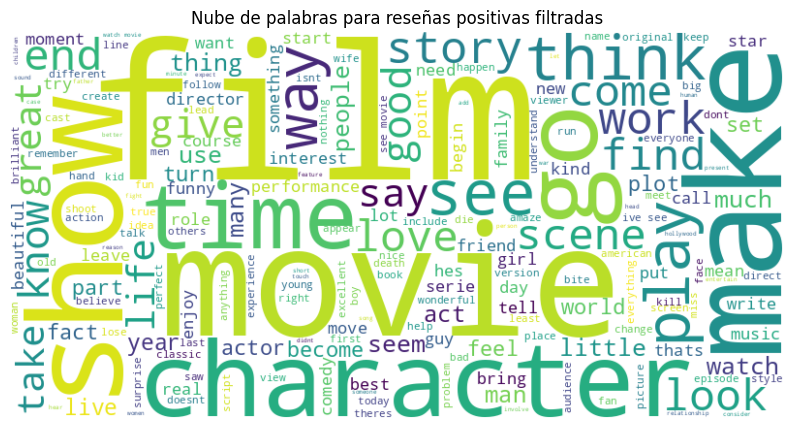

In [ ]:
# Nube de palabras para reseñas positivas filtradas
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(df_positive['filtered_text']))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras para reseñas positivas filtradas')
plt.show()

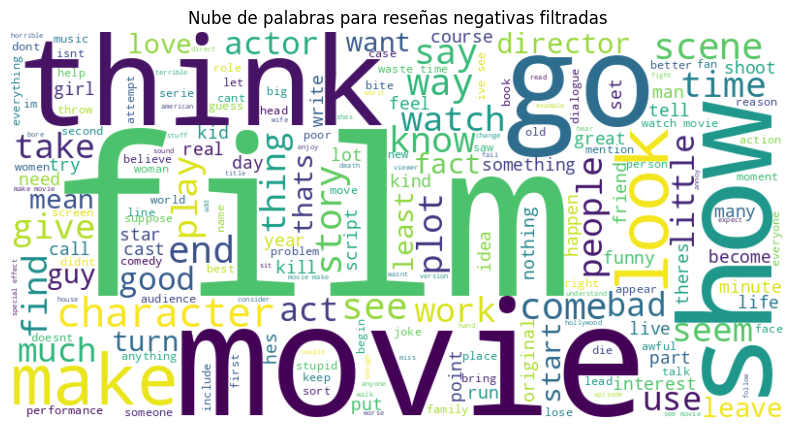

In [ ]:
# Nube de palabras para reseñas negativas filtradas
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(df_negative['filtered_text']))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras para reseñas negativas filtradas')
plt.show()

In [ ]:
# Definir una funcion para contar las palabras en un DataFrame.

def count_words(text, top_n=20):
    #Obtener las palabras mas frecuentes en el texto
    all_words = ' '.join(text).split()
    word_count = Counter(all_words)
    return word_count.most_common(top_n)

In [ ]:
# Obtener las palabras más comunes para positivas y negativas

top_positive_words = count_words(df_positive['filtered_text'], top_n=50)
top_negative_words = count_words(df_negative['filtered_text'], top_n=50)

print(top_positive_words)
print(top_negative_words)

[('film', 49020), ('movie', 36041), ('see', 21303), ('make', 20128), ('get', 15935), ('time', 15443), ('good', 14348), ('character', 13343), ('great', 12638), ('watch', 12415), ('story', 12381), ('go', 12273), ('show', 11835), ('think', 11444), ('love', 10575), ('play', 9703), ('know', 9123), ('take', 8853), ('end', 8701), ('people', 8641), ('give', 8522), ('say', 8469), ('find', 8370), ('come', 8263), ('look', 7840), ('way', 7554), ('many', 7475), ('life', 7377), ('work', 7250), ('movies', 7090), ('best', 7071), ('much', 6948), ('act', 6507), ('dont', 6355), ('man', 6337), ('little', 6142), ('seem', 6077), ('want', 5941), ('years', 5318), ('part', 5194), ('live', 4978), ('feel', 4954), ('scene', 4948), ('first', 4867), ('real', 4864), ('lot', 4828), ('try', 4827), ('plot', 4792), ('scenes', 4731), ('new', 4585)]
[('movie', 47534), ('film', 43097), ('make', 23718), ('see', 19348), ('get', 19226), ('watch', 14502), ('go', 14485), ('time', 14350), ('good', 14151), ('bad', 14036), ('chara

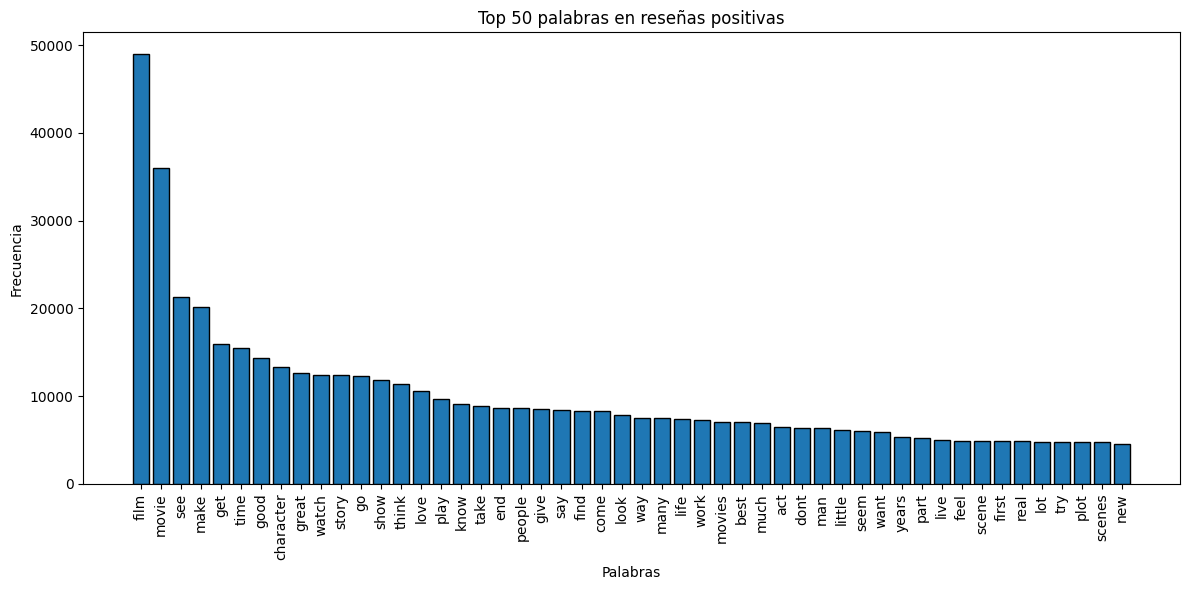

In [ ]:
# Ajustar el ancho de las barras y agregar separación
plt.figure(figsize=(12, 6))
bar_width = 0.8
plt.bar(
    [word for word, count in top_positive_words],
    [count for word, count in top_positive_words],
    width=bar_width,
    edgecolor='black'
)
plt.xticks(rotation=90)
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Top 50 palabras en reseñas positivas')
plt.tight_layout()
plt.show()

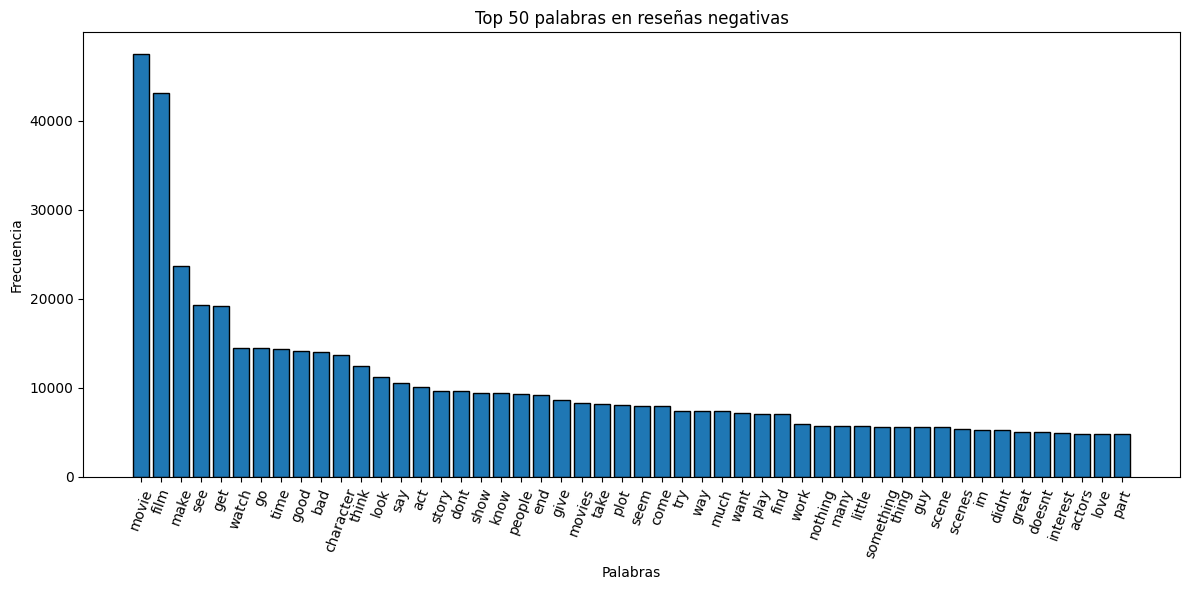

In [ ]:
# generar un gráfico de barras para las palabras más comunes en las reseñas negativas
plt.figure(figsize=(12, 6))
bar_width = 0.8
plt.bar(
    [word for word, count in top_negative_words],
    [count for word, count in top_negative_words],
    width=bar_width,
    edgecolor='black'
)
plt.xticks(rotation=70)
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Top 50 palabras en reseñas negativas')
plt.tight_layout()
plt.show()

In [ ]:
# Crear un dataframe unicamente con el sentimiento y la columna de texto filtrada, para hacer bigramas y trigramas
df_filtrado_positivo = df_positive[['sentiment', 'filtered_text']]
df_filtrado_negativo = df_negative[['sentiment', 'filtered_text']]


In [ ]:
df_filtrado_positivo

,sentiment,filtered_text
0,1,reviewers mention watch oz episode youll hook happen methe first thing strike oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordit call oz nickname give oswald maximum security state penitentary focus emerald city experimental section prison cells glass front face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffle death star dodgy dealings shady agreements awayi say main appeal show due fact go show wouldnt dare forget pretty picture paint mainstream audiences forget charm forget romanceoz doesnt mess first episode saw strike nasty surreal couldnt say ready watch develop taste get accustom high level graphic violence violence injustice crook guard wholl sell inmates wholl kill order get mannered middle class inmates turn prison bitch due lack street skills prison experience watch oz become comfortable uncomfortable viewingthats get touch darker side
1,1,wonderful little production film technique unassuming oldtimebbc fashion give comfort discomforting sense realism entire piece actors choose michael sheen get polari voice pat see seamless edit guide reference williams diary entries worth watch terrificly write perform piece masterful production great master comedy life realism come home little things fantasy guard use traditional dream techniques remain solid disappear play knowledge sense scenes concern set flat halliwells murals decorate surface do
2,1,think wonderful way spend time hot summer weekend sit air condition theater watch lighthearted comedy plot simplistic dialogue witty character likable bread suspect serial killer disappoint realize match point risk addiction think woody allen control style many grow lovethis id woodys comedies years dare say decade ive impress scarlet johanson manage tone sexy image jump right average spirit young womanthis crown jewel career wittier devil wear prada interest superman great comedy go see friends
4,1,petter love time money stun film watch mr mattei offer vivid portrait human relations movie seem tell money power success people different situations encounter variation arthur schnitzlers play theme director transfer action present time new york different character meet connect connect way next person seem know previous point contact film sophisticate luxurious look take see people live world live habitatthe thing get souls picture different stag loneliness inhabit big city best place human relations find sincere fulfillment discern case people encounterthe act good mr matteis direction steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talented cast make character come alivewe wish mr mattei good luck await next work
5,1,alltime favorite movie story selflessness sacrifice dedication noble cause preachy bore get old see time last years paul lukas performance bring tear eye bette davis sympathetic roles delight kid grandma say dressedup midgets children make fun watch mother slow awaken whats happen world roof believable startle dozen thumb theyd movie
...,...,...
49983,1,love fan original series wonder story didnt fail delight love fact eric stoltz didnt recognise person refresh bsg introduce whole wealth new talent cant wait series start air do ronald moore team excellent job special effect dialogue act spot felt tie storyline know purists disagree assessment felt caprica superior scifi stuff produce last decade
49985,1,imaginary heroes best film year complete utter joy watch rivet whole audience sunset rivet film end move speak nothing think film perfect example power drama much set example quality drama work younger generation moments film many least strike great amount beauty emotional beauty couldnt breathe catharsis junkie thats censorial experience ask result powerful masterful storytelling direction heavyweight stuff burtolucci guy element film fit

In [ ]:
df_filtrado_negativo

,sentiment,filtered_text
3,0,theres family little boy jake think theres closet parent fight timethis movie slower soap opera jake decide become rambo kill zombieok youre go make film decide thriller drama drama movie watchable parent divorce argue real life jake closet ruin film expect see boogeyman similar movie watch drama meaningless thriller spot play parent descent dialogs shots jake ignore
7,0,show amaze fresh innovative idea air first years brilliant things drop show funny continue decline complete waste time todayits disgraceful show fall write bad performances bad entertain respite guesthosts show air find hard believe creator handselected original cast choose band hack follow recognize brilliance see fit replace mediocrity felt give star respect original cast make show huge success show awful cant believe air
8,0,encourage positive comment film look watch film bad mistake ive see film worst awful way edit pace storyline act soundtrack film song lame country tune time film look cheap nasty bore extreme happy see end credit film thing prevent give score harvey keitel best performance least seem make bite effort keitel obsessives
10,0,phil alien quirky film humour base everything actual punchlinesat odd funny movie progress didnt find joke oddness funny anymoreits low budget film thats problem pretty interest character lose interesti imagine film appeal stoner partakingfor something similar try brother planet
11,0,saw movie come recall scariest scene big bird eat men dangle parachute right air horror horroras young kid go cheesy b film saturday afternoons tire formula monster type movies include hero beautiful woman daughter professor happy resolution monster die end didnt care much romantic angle year old predictable plot unintentional humorbut year saw psycho come love star janet leigh bump early film sit take notice point screenwriters make story make scary possible wellworn formula rule
...,...,...
49994,0,typical junk laugh genuine moments memorable line scenes think clever nothing plot bad look hell substance movie nothing doesnt matter crap movie crap movie matter whos involve david spade unfunny comedian play lousy character movietv show hes inthis movie dead arrival life fun intelligence plenty dumb comedies enjoyable film pathetic
49996,0,bad plot bad dialogue bad act idiotic direct annoy porn groove soundtrack run overact script crappy copy vhs redeem consume liquor trust stick turkey end bad figure fourthrate spoof springtime hitlerthe girl play janis joplin faint spark interest sing better originalif want watch something similar thousand time watch valley dolls
49997,0,catholic teach parochial elementary school nuns teach jesuit priests high school college practice catholic consider good catholic church eye dont believe certain things act certain ways church tell toso movieits bad people kill nun suppose satire embodiment female religious figurehead comedy satire do act diane keaton saw play different movies goodat think gun fake first shoot plan female lead former students attempt demonstrate sister marys emotional intellectual bigotry faith turn bullets real story tragedythe tragedy loss life former studentsthe live abort baby life students mom tragedy dogmatic authority love people tragedy organize religion replace true faith god wrong todays islam yesterdays judaism christianity
49998,0,im go previous comment side maltin second rate vicious western creak groan try put central theme wild west tame kick steady march time like tradition butch cassidy sundance kid lack film poignancy charm andrew mclaglens direction final minutes real botch incomprehensible strategy part heroes charlton heston chris mitchum someone give holler explain set hillside fire something callous whole treatment rape scene womans reaction afterwards ring true coburn plenty nasty half breed escape convict revenge fellow escape underdevelop theyre bowl pin knock story lurch michael park give shifty mumble performances case appropriate 

In [ ]:
# Tokenizar df_filtrado_positivo['filtered_text'] y df_filtrado_negativo['filtered_text'] para contar bigramas y trigramas

from nltk import ngrams
from nltk.tokenize import word_tokenize

# Tokenizar reseñas positivas y negativas
df_filtrado_positivo['tokens'] = df_filtrado_positivo['filtered_text'].apply(lambda x: word_tokenize(x))
df_filtrado_negativo['tokens'] = df_filtrado_negativo['filtered_text'].apply(lambda x: word_tokenize(x))

# Contar bigramas, trigramas, cuatrigramas
df_filtrado_positivo['bigrams'] = df_filtrado_positivo['tokens'].apply(lambda x: list(ngrams(x, 2)))
df_filtrado_positivo['trigrams'] = df_filtrado_positivo['tokens'].apply(lambda x: list(ngrams(x, 3)))
df_filtrado_positivo['cuatrigrams'] = df_filtrado_positivo['tokens'].apply(lambda x: list(ngrams(x, 4)))
df_filtrado_negativo['bigrams'] = df_filtrado_negativo['tokens'].apply(lambda x: list(ngrams(x, 2)))
df_filtrado_negativo['trigrams'] = df_filtrado_negativo['tokens'].apply(lambda x: list(ngrams(x, 3)))
df_filtrado_negativo['cuatrigrams'] = df_filtrado_negativo['tokens'].apply(lambda x: list(ngrams(x, 4)))




<ipython-input-54-2e8cec181d0a>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-54-2e8cec181d0a>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-54-2e8cec181d0a>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-54-2e8cec

In [ ]:
### Funciones para contar bigramas, trigramas y cuatrigramas
from collections import Counter

# Contar los bigramas más comunes
def contar_bigramas(df, columna='bigrams', top_n=10):
    # Aplanar la lista de listas de bigramas
    bigramas = [bigram for row in df[columna] for bigram in row]
    # Usar Counter para contar las frecuencias
    contador_bigramas = Counter(bigramas)
    # Obtener los bigramas más comunes
    return contador_bigramas.most_common(top_n)

# Contar los trigramas más comunes
def contar_trigramas(df, columna='trigrams', top_n=10):
    # Aplanar la lista de listas de trigramas
    trigramas = [trigram for row in df[columna] for trigram in row]
    # Usar Counter para contar las frecuencias
    contador_trigramas = Counter(trigramas)
    # Obtener los trigramas más comunes
    return contador_trigramas.most_common(top_n)

# Contar los cuatrigramas más comunes
def contar_cuatrigramas(df, columna='cuatrigrams', top_n=10):
    # Aplanar la lista de listas de cuatrigramas
    cuatrigramas = [cuatrigram for row in df[columna] for cuatrigram in row]
    # Usar Counter para contar las frecuencias
    contador_cuatrigramas = Counter(cuatrigramas)
    # Obtener los cuatrigramas más comunes
    return contador_cuatrigramas.most_common(top_n)

In [ ]:
# Calcular bigramas más comunes para reseñas positivas
top_bigramas = contar_bigramas(df_filtrado_positivo, columna='bigrams', top_n=100)
print("Bigramas más comunes:")
for bigrama, frecuencia in top_bigramas:
    print(f"{bigrama}: {frecuencia}")

# Calcular trigramas más comunes para reseñas positivas
top_trigramas = contar_trigramas(df_filtrado_positivo, columna='trigrams', top_n=100)
print("\nTrigramas más comunes:")
for trigrama, frecuencia in top_trigramas:
    print(f"{trigrama}: {frecuencia}")

# Calcular cuatrigramas más comunes para reseñas positivas
top_cuatrigramas = contar_cuatrigramas(df_filtrado_positivo, columna='cuatrigrams', top_n=100)
print("\nCuatrigramas más comunes:")
for cuatrigrama, frecuencia in top_cuatrigramas:
    print(f"{cuatrigrama}: {frecuencia}")

Bigramas más comunes:
('ive', 'see'): 1532
('see', 'movie'): 1265
('film', 'make'): 1231
('watch', 'movie'): 1168
('see', 'film'): 1081
('make', 'film'): 913
('first', 'time'): 876
('dont', 'know'): 843
('main', 'character'): 821
('movie', 'make'): 808
('new', 'york'): 800
('special', 'effect'): 786
('watch', 'film'): 780
('take', 'place'): 773
('make', 'movie'): 734
('great', 'movie'): 657
('good', 'movie'): 646
('film', 'see'): 611
('great', 'film'): 604
('horror', 'film'): 602
('want', 'see'): 592
('im', 'sure'): 581
('real', 'life'): 571
('love', 'movie'): 569
('dont', 'think'): 566
('go', 'see'): 562
('saw', 'movie'): 559
('movie', 'good'): 552
('fall', 'love'): 550
('high', 'school'): 531
('worth', 'watch'): 501
('tell', 'story'): 495
('movie', 'see'): 492
('long', 'time'): 478
('movie', 'great'): 476
('good', 'film'): 473
('story', 'line'): 461
('think', 'movie'): 460
('love', 'story'): 454
('year', 'old'): 452
('many', 'people'): 451
('havent', 'see'): 450
('film', 'good'): 442

In [ ]:
# Calcular bigramas más comunes para reseñas negativas
top_bigramas = contar_bigramas(df_filtrado_negativo, columna='bigrams', top_n=50)
print("Bigramas más comunes:")
for bigrama, frecuencia in top_bigramas:
    print(f"{bigrama}: {frecuencia}")

# Calcular trigramas más comunes para reseñas negativas
top_trigramas = contar_trigramas(df_filtrado_negativo, columna='trigrams', top_n=50)
print("\nTrigramas más comunes:")
for trigrama, frecuencia in top_trigramas:
    print(f"{trigrama}: {frecuencia}")

# Calcular cuatrigramas más comunes para reseñas negativas
top_cuatrigramas = contar_cuatrigramas(df_filtrado_negativo, columna='cuatrigrams', top_n=50)
print("\nCuatrigramas más comunes:")
for cuatrigrama, frecuencia in top_cuatrigramas:
    print(f"{cuatrigrama}: {frecuencia}")



Bigramas más comunes:
('ive', 'see'): 1862
('watch', 'movie'): 1658
('waste', 'time'): 1601
('special', 'effect'): 1413
('movie', 'make'): 1331
('see', 'movie'): 1214
('make', 'movie'): 1200
('dont', 'know'): 1187
('film', 'make'): 1153
('main', 'character'): 1058
('make', 'sense'): 963
('make', 'film'): 923
('want', 'see'): 901
('im', 'sure'): 859
('low', 'budget'): 855
('bad', 'movie'): 843
('watch', 'film'): 824
('movie', 'bad'): 816
('see', 'film'): 782
('horror', 'film'): 782
('bad', 'guy'): 752
('dont', 'think'): 715
('worst', 'movie'): 687
('good', 'movie'): 678
('bad', 'act'): 655
('take', 'place'): 630
('movie', 'see'): 614
('horror', 'movie'): 612
('year', 'old'): 609
('worst', 'film'): 595
('dont', 'get'): 569
('high', 'school'): 549
('go', 'see'): 544
('film', 'see'): 540
('whole', 'movie'): 535
('try', 'make'): 519
('movie', 'get'): 512
('bad', 'film'): 507
('movie', 'good'): 486
('act', 'bad'): 486
('read', 'book'): 485
('story', 'line'): 484
('whole', 'thing'): 481
('end

In [ ]:
# Exportar df_cleaned a un archivo CSV para utilizarlo en el siguiente notebook
#df_cleaned.to_csv('df_cleaned.csv', index=False)

## 4. Modelado

- El modelamiento se hizo en dos notebooks separados por el tema del manejo de memoria y la refactorizacion de variables que habia que hacer.

- Modelo Tf-idef notebook Taller_Tf-idf_Part.ipynb https://colab.research.google.com/drive/1ZPiYn2pP3DC3ZK8CUAaRdXtAzvq-KOX2#scrollTo=gaxXBFJhr7ZN

- Modelo Word2Vec notebook Taller_Word2Vec_Part.ipynb  https://colab.research.google.com/drive/1PcGfcdch_qluUQhHqVXPPxHATUbydr6B#scrollTo=2yY-1hBbO2wn